In [166]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [167]:
filename = '../../data/processed/feature-eng-clustered.csv'
df = pd.read_csv(filename)
df.head()

,zipcode,start_year,avg_eqi_year_5-10,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_2_EQI_MSA,...,recpi_state_change_2,recpi_state_change_3,recpi_state_change_4,avg_eqi_year_1-5,dataset_cluster,zip_cluster,msa_cluster,state_cluster,eqi_cluster,recpi_cluster
0,1001,1992,0.001287,0.001549,0.002111,0.002216,1.176876,28.052156,0.048744,0.001266,...,1.020560,1.036390,1.251689,0.002170,3,0,0,1,0,0
1,1001,1997,0.001853,0.001233,0.002386,0.000840,1.112023,41.174500,0.035283,0.001164,...,1.245044,1.448812,0.693670,0.001287,3,0,0,1,0,0
2,1001,2002,0.000602,0.001494,0.002450,0.001504,1.746593,50.713380,0.054131,0.001073,...,0.905151,1.007785,1.046863,0.001853,3,0,0,1,0,0
3,1001,2007,0.000898,0.000702,0.001817,0.000611,1.081845,45.171143,0.036063,0.000758,...,0.801518,1.088810,1.051707,0.000602,3,0,0,1,0,0
4,1002,1992,0.002931,0.001549,0.002111,0.000959,1.176876,28.052156,0.020148,0.001266,...,1.020560,1.036390,1.251689,0.003141,3,1,0,1,0,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68136 entries, 0 to 68135
Data columns (total 68 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zipcode               68136 non-null  int64  
 1   start_year            68136 non-null  int64  
 2   avg_eqi_year_5-10     68136 non-null  float64
 3   year_1_EQI_MSA        68136 non-null  float64
 4   year_1_EQI_state      68136 non-null  float64
 5   year_1_EQI_zip        68136 non-null  float64
 6   year_1_RECPI_MSA      68136 non-null  float64
 7   year_1_RECPI_state    68136 non-null  float64
 8   year_1_RECPI_zip      68136 non-null  float64
 9   year_2_EQI_MSA        68136 non-null  float64
 10  year_2_EQI_state      68136 non-null  float64
 11  year_2_EQI_zip        68136 non-null  float64
 12  year_2_RECPI_MSA      68136 non-null  float64
 13  year_2_RECPI_state    68136 non-null  float64
 14  year_2_RECPI_zip      68136 non-null  float64
 15  year_3_EQI_MSA     

In [222]:
filename = '../../data/processed/sample-feature-eng-clustered.csv'
sample = pd.read_csv(filename)
sample.head()

,zipcode,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,start_year,year_2_EQI_MSA,year_2_EQI_state,...,recpi_state_change_2,recpi_state_change_3,recpi_state_change_4,avg_eqi_year_1-5,dataset_cluster,zip_cluster,msa_cluster,state_cluster,eqi_cluster,recpi_cluster
0,94105,0.004069,0.001958,0.010818,84.499120,305.42075,4.846636,2012.0,0.004284,0.002042,...,1.153290,1.111117,0.960256,0.011760,1,2,2,0,1,3
1,94105,0.003005,0.001728,0.004916,62.051678,295.80084,2.168169,2007.0,0.002955,0.001725,...,0.888780,1.048553,1.158418,0.006396,1,2,2,0,1,3
2,94105,0.002852,0.001878,0.003977,39.292477,220.55566,0.867056,2002.0,0.002594,0.001715,...,1.104955,1.096684,1.032946,0.005360,1,2,2,0,1,3
3,94105,0.002967,0.002179,0.005334,29.351414,148.66182,1.098702,1997.0,0.002943,0.002179,...,1.373139,1.395414,0.708871,0.008573,1,2,2,0,1,3
4,94105,0.002321,0.001897,0.002985,12.946106,78.22849,0.304480,1992.0,0.002108,0.001978,...,1.057555,1.139301,1.224183,0.002920,1,1,2,0,1,3


In [170]:
X = df['zipcode'].unique()
y = df['zipcode'].unique()

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
X = df.drop('avg_eqi_year_5-10', axis=1)
y = df[['zipcode','start_year','avg_eqi_year_5-10']]

In [173]:
X_train = pd.DataFrame(X_train)
X_train.columns = ['zipcode']

X_test = pd.DataFrame(X_test)
X_test.columns = ['zipcode']

y_train = pd.DataFrame(y_train)
y_train.columns = ['zipcode']

y_test = pd.DataFrame(y_test)
y_test.columns = ['zipcode']

In [174]:
X_train = X_train.merge(X, on='zipcode').sort_values(['zipcode','start_year'], ignore_index=True)
X_test = X_test.merge(X, on='zipcode').sort_values(['zipcode','start_year'], ignore_index=True)
y_train = y_train.merge(y, on='zipcode').sort_values(['zipcode','start_year'], ignore_index=True)
y_test = y_test.merge(y, on='zipcode').sort_values(['zipcode','start_year'], ignore_index=True)

In [175]:
X_test = X_test.drop(['zipcode','start_year'], axis=1)
X_train = X_train.drop(['zipcode','start_year'], axis=1)
y_test = y_test[['avg_eqi_year_5-10']].to_numpy().ravel()
y_train = y_train[['avg_eqi_year_5-10']].to_numpy().ravel()

In [176]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54508 entries, 0 to 54507
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year_1_EQI_MSA        54508 non-null  float64
 1   year_1_EQI_state      54508 non-null  float64
 2   year_1_EQI_zip        54508 non-null  float64
 3   year_1_RECPI_MSA      54508 non-null  float64
 4   year_1_RECPI_state    54508 non-null  float64
 5   year_1_RECPI_zip      54508 non-null  float64
 6   year_2_EQI_MSA        54508 non-null  float64
 7   year_2_EQI_state      54508 non-null  float64
 8   year_2_EQI_zip        54508 non-null  float64
 9   year_2_RECPI_MSA      54508 non-null  float64
 10  year_2_RECPI_state    54508 non-null  float64
 11  year_2_RECPI_zip      54508 non-null  float64
 12  year_3_EQI_MSA        54508 non-null  float64
 13  year_3_EQI_state      54508 non-null  float64
 14  year_3_EQI_zip        54508 non-null  float64
 15  year_3_RECPI_MSA   

In [177]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import r2_score, mean_gamma_deviance, mean_absolute_error

In [178]:
column_trans = ColumnTransformer([
    ('scale', StandardScaler(), make_column_selector(dtype_include=np.float64)),
    ('dataset_cluster', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['dataset_cluster']),
    ('zip_cluster', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['zip_cluster']),
    ('msa_cluster', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['msa_cluster']),
    ('state_cluster', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['state_cluster']),
    ('eqi_cluster', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['eqi_cluster']),
    ('recpi_cluster', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['recpi_cluster'])
    ], remainder='drop')

column_trans.fit(X_train)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000147905A0BE0>),
                                ('dataset_cluster',
                                 OneHotEncoder(dtype='int',
                                               handle_unknown='ignore'),
                                 ['dataset_cluster']),
                                ('zip_cluster',
                                 OneHotEncoder(dtype='int',
                                               handle_unknown='ignore'),
                                 ['zip_cluster']),
                                ('msa_cluster',
                                 OneHotEncoder(dtype='int',
                                               handle_unknown='ignore'),
                                 ['msa_cluster']),
                                ('state_cluster',
                                 OneHotEncoder(dtype='int',
   

In [179]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
rf = RandomForestRegressor(bootstrap=False, max_depth=72, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=315)

In [181]:
pipe = Pipeline([('transformer', column_trans), ('rf', rf)])

In [182]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000147905A0BE0>),
                                                 ('dataset_cluster',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['dataset_cluster']),
                                                 ('zip_cluster',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['zip_cluster']),
                                                 (...
                                                  OneHotEncoder(dtype='int',
            

In [183]:
y_pred = pipe.predict(X_test)

In [184]:
r2_score(y_test, y_pred)

0.6024671259581346

In [185]:
y_comp = pd.DataFrame(y_test)
y_comp = y_comp.rename(columns={0: "Target"})

In [186]:
y_comp['Prediction'] = y_pred

In [187]:
y_comp['Diff'] = y_comp['Prediction'] - y_comp['Target']

In [188]:
y_comp['PE'] = (y_comp['Diff'] / y_comp['Target'])

In [189]:
y_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13628 entries, 0 to 13627
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Target      13628 non-null  float64
 1   Prediction  13628 non-null  float64
 2   Diff        13628 non-null  float64
 3   PE          13628 non-null  float64
dtypes: float64(4)
memory usage: 426.0 KB


In [190]:
bin_labels = [1, 2, 3, 4]
y_comp['Bin'] = pd.qcut(y_comp['Target'], q=4, labels=bin_labels)

In [191]:
y_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13628 entries, 0 to 13627
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Target      13628 non-null  float64 
 1   Prediction  13628 non-null  float64 
 2   Diff        13628 non-null  float64 
 3   PE          13628 non-null  float64 
 4   Bin         13628 non-null  category
dtypes: category(1), float64(4)
memory usage: 439.5 KB


In [192]:
quartile_metrics = pd.DataFrame()

In [193]:
quartile_metrics['q'] = [1, 2, 3, 4]

In [194]:
quartile_metrics

,q
0,1
1,2
2,3
3,4


### R-squared

In [195]:
quartile_metrics.at[0,'r2_score'] = r2_score(y_comp[y_comp['Bin']==1]['Target'], y_comp[y_comp['Bin']==1]['Prediction'])

In [196]:
quartile_metrics.at[1, 'r2_score'] = r2_score(y_comp[y_comp['Bin']==2]['Target'], y_comp[y_comp['Bin']==2]['Prediction'])

In [197]:
quartile_metrics.at[2, 'r2_score'] = r2_score(y_comp[y_comp['Bin']==3]['Target'], y_comp[y_comp['Bin']==3]['Prediction'])

In [198]:
quartile_metrics.at[3, 'r2_score'] = r2_score(y_comp[y_comp['Bin']==4]['Target'], y_comp[y_comp['Bin']==4]['Prediction'])

### Mean Absolute Error

In [199]:
quartile_metrics.at[0, 'mae'] = mean_absolute_error(y_comp[y_comp['Bin']==1]['Target'], y_comp[y_comp['Bin']==1]['Prediction'])

In [200]:
quartile_metrics.at[1, 'mae'] = mean_absolute_error(y_comp[y_comp['Bin']==2]['Target'], y_comp[y_comp['Bin']==2]['Prediction'])

In [201]:
quartile_metrics.at[2,'mae'] = mean_absolute_error(y_comp[y_comp['Bin']==3]['Target'], y_comp[y_comp['Bin']==3]['Prediction'])

In [202]:
quartile_metrics.at[3, 'mae'] = mean_absolute_error(y_comp[y_comp['Bin']==4]['Target'], y_comp[y_comp['Bin']==4]['Prediction'])

In [203]:
quartile_metrics

,q,r2_score,mae
0,1,-5.782477,0.000051
1,2,-13.024810,0.000055
2,3,-12.306603,0.000076
3,4,0.529137,0.000400


### Mean Percentage Error

In [204]:
quartile_metrics.at[0, 'mean'] = y_comp[y_comp['Bin']==1]['Target'].mean()

In [205]:
quartile_metrics.at[1, 'mean'] = y_comp[y_comp['Bin']==2]['Target'].mean()

In [206]:
quartile_metrics.at[2, 'mean'] = y_comp[y_comp['Bin']==3]['Target'].mean()

In [207]:
quartile_metrics.at[3, 'mean'] = y_comp[y_comp['Bin']==4]['Target'].mean()

In [208]:
quartile_metrics['mpe'] = quartile_metrics.apply(lambda row: (row['mae'] / row['mean']) * 100, axis=1)

In [209]:
sign = (y_comp[y_comp['Bin']==1]['Prediction'].mean() - y_comp[y_comp['Bin']==1]['Target'].mean()) / abs(y_comp[y_comp['Bin']==1]['Prediction'].mean() - y_comp[y_comp['Bin']==1]['Target'].mean())
quartile_metrics.at[0, 'mpe'] = quartile_metrics.at[0, 'mpe'] * sign

In [210]:
sign = (y_comp[y_comp['Bin']==2]['Prediction'].mean() - y_comp[y_comp['Bin']==2]['Target'].mean()) / abs(y_comp[y_comp['Bin']==2]['Prediction'].mean() - y_comp[y_comp['Bin']==2]['Target'].mean())
quartile_metrics.at[1, 'mpe'] = quartile_metrics.at[1, 'mpe'] * sign

In [211]:
sign = (y_comp[y_comp['Bin']==3]['Prediction'].mean() - y_comp[y_comp['Bin']==3]['Target'].mean()) / abs(y_comp[y_comp['Bin']==3]['Prediction'].mean() - y_comp[y_comp['Bin']==3]['Target'].mean())
quartile_metrics.at[2, 'mpe'] = quartile_metrics.at[2, 'mpe'] * sign

In [212]:
sign = (y_comp[y_comp['Bin']==4]['Prediction'].mean() - y_comp[y_comp['Bin']==4]['Target'].mean()) / abs(y_comp[y_comp['Bin']==4]['Prediction'].mean() - y_comp[y_comp['Bin']==4]['Target'].mean())
quartile_metrics.at[3, 'mpe'] = quartile_metrics.at[3, 'mpe'] * sign

In [213]:
quartile_metrics

,q,r2_score,mae,mean,mpe
0,1,-5.782477,0.000051,0.000136,37.102723
1,2,-13.024810,0.000055,0.000228,24.302412
2,3,-12.306603,0.000076,0.000338,22.478175
3,4,0.529137,0.000400,0.001087,-36.815125


## Visualization

In [214]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

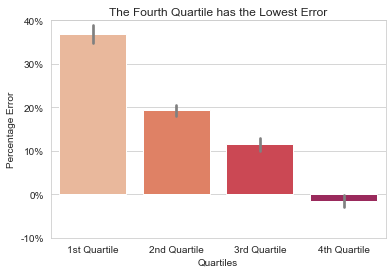

In [215]:
sns.set_style("whitegrid")
sns.color_palette("mako")
fig = sns.barplot(x=y_comp['Bin'], y=y_comp['PE'], ci=95, errcolor='grey', palette=sns.color_palette("rocket_r"))
plt.ylim(-.10, .40)
vals = fig.get_yticks()
fig.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.xticks(np.arange(4), ('1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'))
plt.xlabel('Quartiles')
plt.ylabel('Percentage Error')
plt.title('The Fourth Quartile has the Lowest Error')
plt.savefig('../../reports/figures/PE_quartiles')

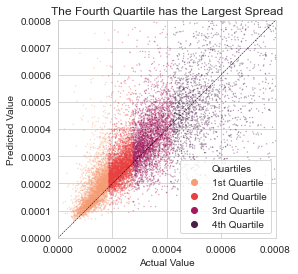

In [216]:
fig = sns.scatterplot(data=y_comp, x='Target', y='Prediction', s=2, palette="rocket_r", hue='Bin', edgecolor='None', alpha=0.4)

# replace labels
new_labels = ['Quartiles','1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']
for t, l in zip(fig.legend().texts, new_labels): t.set_text(l)

fig.set_aspect('equal', adjustable='box')
X_plot = np.linspace(0, 0.001, 100)
y_plot = np.linspace(0, 0.001, 100)
plt.plot(X_plot, y_plot, ls="--", c='black', linewidth=0.5)
plt.xlim(0, 0.0008)
plt.ylim(0, 0.0008)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('The Fourth Quartile has the Largest Spread')
plt.savefig('../../reports/figures/actual_vs_predicted')

In [217]:
X_train

,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_2_EQI_MSA,year_2_EQI_state,year_2_EQI_zip,year_2_RECPI_MSA,...,recpi_state_change_2,recpi_state_change_3,recpi_state_change_4,avg_eqi_year_1-5,dataset_cluster,zip_cluster,msa_cluster,state_cluster,eqi_cluster,recpi_cluster
0,0.001549,0.002111,0.000959,1.176876,28.052156,0.020148,0.001266,0.002057,0.002858,1.043205,...,1.020560,1.036390,1.251689,0.003141,3,1,0,1,0,0
1,0.001233,0.002386,0.004272,1.112023,41.174500,0.128172,0.001164,0.002573,0.000891,0.946344,...,1.245044,1.448812,0.693670,0.002931,3,1,0,1,0,0
2,0.001494,0.002450,0.005398,1.746593,50.713380,0.291470,0.001073,0.002257,0.001354,1.293282,...,0.905151,1.007785,1.046863,0.002640,3,1,0,1,0,0
3,0.000702,0.001817,0.000895,1.081845,45.171143,0.068894,0.000758,0.002125,0.002999,1.115158,...,0.801518,1.088810,1.051707,0.001622,3,0,0,1,0,0
4,0.000529,0.002111,0.000714,0.039692,28.052156,0.004995,0.000527,0.002057,0.001611,0.031638,...,1.020560,1.036390,1.251689,0.001013,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54503,0.000109,0.000126,0.000109,0.015245,0.170988,0.004458,0.000103,0.000120,0.000139,0.012261,...,0.827735,1.237103,1.240086,0.000102,0,0,0,0,1,0
54504,0.000183,0.000205,0.000183,0.001097,0.036569,0.001097,0.000139,0.000194,0.000139,0.000139,...,1.258219,0.820536,1.341713,0.000192,0,0,0,0,1,0
54505,0.000105,0.000178,0.000105,0.000948,0.071627,0.000948,0.000094,0.000239,0.000094,0.001132,...,0.995711,0.847618,0.991336,0.000182,0,0,0,0,1,0
54506,0.000103,0.000135,0.000103,0.002161,0.098865,0.002161,0.000130,0.000127,0.000124,0.003499,...,1.010700,1.170045,0.852112,0.000112,0,0,0,0,1,0


## Sample for Zipcode 94105

In [305]:
X_sample = sample.drop(['zipcode', 'start_year'], axis=1)
y_sample = sample[['start_year']]

In [306]:
sample_pred = pipe.predict(X_sample)

C:\Users\thoma\anaconda3\envs\capstone-02\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [307]:
X_sample

,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_2_EQI_MSA,year_2_EQI_state,year_2_EQI_zip,year_2_RECPI_MSA,...,recpi_state_change_4,avg_eqi_year_1-5,dataset_cluster,zip_cluster,msa_cluster,state_cluster,eqi_cluster,recpi_cluster,pred,actual
0,0.004069,0.001958,0.010818,84.499120,305.42075,4.846636,0.004284,0.002042,0.009686,98.440640,...,0.960256,0.011760,1,2,2,0,1,3,0.010984,0
1,0.003005,0.001728,0.004916,62.051678,295.80084,2.168169,0.002955,0.001725,0.005423,55.751286,...,1.158418,0.006396,1,2,2,0,1,3,0.009194,1
2,0.002852,0.001878,0.003977,39.292477,220.55566,0.867056,0.002594,0.001715,0.005364,38.885723,...,1.032946,0.005360,1,2,2,0,1,3,0.005975,1
3,0.002967,0.002179,0.005334,29.351414,148.66182,1.098702,0.002943,0.002179,0.005961,30.658838,...,0.708871,0.008573,1,2,2,0,1,3,0.005492,1
4,0.002321,0.001897,0.002985,12.946106,78.22849,0.304480,0.002108,0.001978,0.002705,12.899301,...,1.224183,0.002920,1,1,2,0,1,3,0.005597,1


In [308]:
sample['pred'] = sample_pred
sample['actual'] = 1
sample.at[0,'actual'] = 0

In [309]:
sample

,zipcode,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,start_year,year_2_EQI_MSA,year_2_EQI_state,...,recpi_state_change_4,avg_eqi_year_1-5,dataset_cluster,zip_cluster,msa_cluster,state_cluster,eqi_cluster,recpi_cluster,pred,actual
0,94105,0.004069,0.001958,0.010818,84.499120,305.42075,4.846636,2012.0,0.004284,0.002042,...,0.960256,0.011760,1,2,2,0,1,3,0.010984,0
1,94105,0.003005,0.001728,0.004916,62.051678,295.80084,2.168169,2007.0,0.002955,0.001725,...,1.158418,0.006396,1,2,2,0,1,3,0.009194,1
2,94105,0.002852,0.001878,0.003977,39.292477,220.55566,0.867056,2002.0,0.002594,0.001715,...,1.032946,0.005360,1,2,2,0,1,3,0.005975,1
3,94105,0.002967,0.002179,0.005334,29.351414,148.66182,1.098702,1997.0,0.002943,0.002179,...,0.708871,0.008573,1,2,2,0,1,3,0.005492,1
4,94105,0.002321,0.001897,0.002985,12.946106,78.22849,0.304480,1992.0,0.002108,0.001978,...,1.224183,0.002920,1,1,2,0,1,3,0.005597,1


In [310]:
sample_graph = sample[['start_year','avg_eqi_year_1-5']]
sample_graph['actual'] = 1

<ipython-input-310-2e934fa9f65a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_graph['actual'] = 1


In [311]:
sample_graph.at[5,'start_year'] = 2017
sample_graph.at[5,'avg_eqi_year_1-5'] = sample_pred[0]
sample_graph.at[5,'actual'] = 0

C:\Users\thoma\anaconda3\envs\capstone-02\lib\site-packages\pandas\core\frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


In [312]:
sample_graph = sample_graph.sort_values(by=['start_year'])

In [313]:
sample_graph

,start_year,avg_eqi_year_1-5,actual
4,1992.0,0.002920,1.0
3,1997.0,0.008573,1.0
2,2002.0,0.005360,1.0
1,2007.0,0.006396,1.0
0,2012.0,0.011760,1.0
5,2017.0,0.010984,0.0


In [314]:
sample_graph = sample_graph.append(sample_graph.iloc[4])
sample_graph = sample_graph.sort_values(by=['start_year'])
sample_graph = sample_graph.reset_index(drop=True)

In [317]:
sample_graph.at[5,'actual'] = 0

In [318]:
sample_graph

,start_year,avg_eqi_year_1-5,actual
0,1992.0,0.002920,1.0
1,1997.0,0.008573,1.0
2,2002.0,0.005360,1.0
3,2007.0,0.006396,1.0
4,2012.0,0.011760,1.0
5,2012.0,0.011760,0.0
6,2017.0,0.010984,0.0


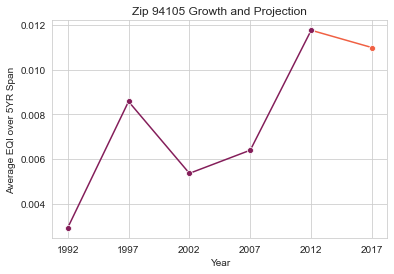

In [328]:
plot = sns.lineplot(data=sample_graph, x="start_year", y="avg_eqi_year_1-5", hue='actual', marker='o', palette="rocket_r", legend=False)
plot.set(xticks=[1992,1997,2002,2007,2012,2017])
plt.title('Zip 94105 Growth and Projection')
plt.xlabel('Year')
plt.ylabel('Average EQI over 5YR Span')
plt.savefig('../../reports/figures/zip94105_projection')